# Submission details
Name: Callum Freeburn


Model: Artifical Neural Network

## **Import Libraries, Set up and Validate Data**

In [68]:
#import Libraries
import tensorflow as tf
from keras import datasets, layers, models
import os
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
from skimage import feature 
from sklearn import metrics
import seaborn as sns
import cv2
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [69]:
# get versions of tensorflow and keras
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)

2.8.0
2.8.0


In [70]:
#import data from keras dataset and split the data into train and test
digitsMnist=tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = digitsMnist.load_data()

In [71]:
#get the shape of data to make sure it is 28, 28
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [72]:
#normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [73]:
#convert the data into numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

five
nine
six
zero


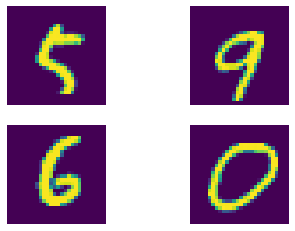

In [74]:
#config labels for images
labelNames = ["zero", "one", "two", "three", "four", "five", "six", "seven", "eight", "nine"]

#show 4 random images to ensure they are correct
img_index = random.randint(0, 59999)
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.axis('off')
ax1.imshow(X_train[img_index])
print(labelNames[y_train[img_index]])

ax2 = fig.add_subplot(2,2,2)
ax2.axis('off')
img_index = random.randint(0, 59999)
ax2.imshow(X_train[img_index])
print(labelNames[y_train[img_index]])

ax2 = fig.add_subplot(2,2,3)
ax2.axis('off')
img_index = random.randint(0, 59999)
ax2.imshow(X_train[img_index])
print(labelNames[y_train[img_index]])

ax2 = fig.add_subplot(2,2,4)
ax2.axis('off')
img_index = random.randint(0, 59999)
ax2.imshow(X_train[img_index])
print(labelNames[y_train[img_index]])

## **Implementing Raw Input Feature into ANN Model**

In [75]:
#config ANN Model 
ANN_model_raw_pixels = models.Sequential()
ANN_model_raw_pixels.add(layers.Flatten())
ANN_model_raw_pixels.add(layers.Dense(128, activation='relu'))
ANN_model_raw_pixels.add(layers.Dense(128, activation='relu'))
ANN_model_raw_pixels.add(layers.Dense(10, activation='softmax'))

In [76]:
#compile the model and fit with training data with 10 epochs
ANN_model_raw_pixels.compile(
    optimizer = tf.optimizers.Adam(),
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy'])

H=ANN_model_raw_pixels.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2295 - accuracy: 0.9327
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0959 - accuracy: 0.9710
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0676 - accuracy: 0.9786
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0509 - accuracy: 0.9839
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0401 - accuracy: 0.9865
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0322 - accuracy: 0.9898
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0263 - accuracy: 0.9913
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0225 - accuracy: 0.9925
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0192 - accuracy: 0.9941
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.019

In [77]:
#get summary of ANN Model
ANN_model_raw_pixels.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (32, 784)                 0         
                                                                 
 dense_9 (Dense)             (32, 128)                 100480    
                                                                 
 dense_10 (Dense)            (32, 128)                 16512     
                                                                 
 dense_11 (Dense)            (32, 10)                  1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


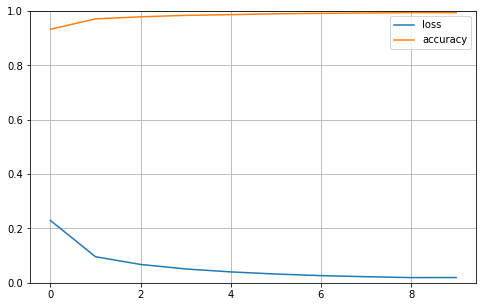

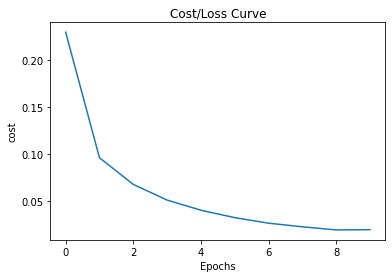

In [78]:
#visulize the loss and accuarcy curve
pd.DataFrame(H.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

plt.plot(H.history['loss'])
plt.ylabel('cost')
plt.xlabel('Epochs')
plt.title("Cost/Loss Curve")
plt.show()

In [79]:
# evaluate model against test data
results_test_raw_pixels = ANN_model_raw_pixels.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0966 - accuracy: 0.9778


[[ 971    0    0    2    1    0    2    0    2    2]
 [   0 1112    4    1    3    0    6    1    8    0]
 [   3    1 1011    2    2    0    1    3    8    1]
 [   0    0    5  987    0    9    0    3    5    1]
 [   1    0    0    1  974    0    2    0    1    3]
 [   2    0    0    7    1  874    2    0    4    2]
 [   1    2    2    2    7   13  928    0    3    0]
 [   1    0    5    3    5    0    0 1006    4    4]
 [   1    0    3    3    5    1    1    3  954    3]
 [   2    3    0    5   26    4    0    5    3  961]]


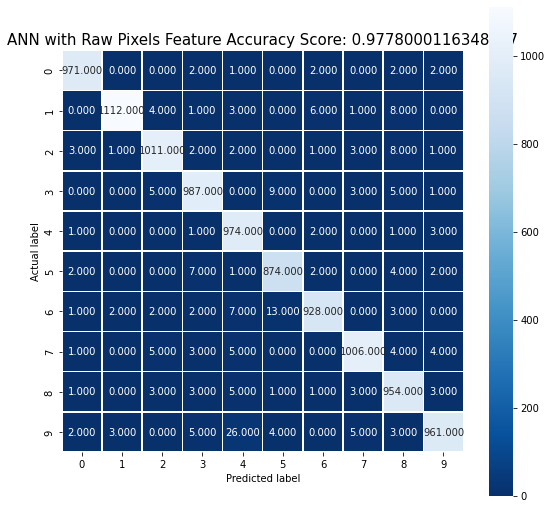

In [80]:
#obtain predictiona and accuarcy for confussion matrix
y_pred = ANN_model_raw_pixels.predict(X_test)
predictions_raw_pixels = np.argmax(y_pred, axis = -1)
cm = metrics.confusion_matrix(y_test, predictions_raw_pixels)
print(cm)

# Visulise Confussion Matrix
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'ANN with Raw Pixels Feature Accuracy Score: {0}'.format(results_test_raw_pixels[1])
plt.title(all_sample_title, size = 15);

6
3
5
7
5
8
3
0
3
7
6
2
7
1
0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


3
three


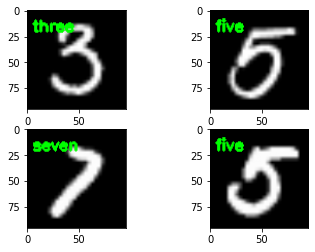

In [81]:
#visualize 10 random predictions.
images = []
orig_labels=[]
# randomly select a few testing digit items
for i in np.random.choice(np.arange(0, len(y_test)), size=(16,)):
  # classify the digit
  test_img = (X_test[i])
  predict_x=ANN_model_raw_pixels.predict(test_img.reshape(-1, 28, 28)) 
  prediction=np.argmax(predict_x,axis=1)
  label = labelNames[prediction[0]]

  orig_label=labelNames[y_test[i]]
  image = X_test[i]
  color = (0, 255, 0)
  image = cv2.merge([image] * 3)
  image = cv2.resize(image, (96, 96), interpolation=cv2.INTER_LINEAR)
  cv2.putText(image, label, (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.50, color, 2)
  images.append(image)

## Display the classification results
#Plot the image and the predicted labels
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(images[1])
print(orig_label[:])
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(images[2])
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(images[3])
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(images[4])

## **Implementing LBP Feature into ANN Model**

In [82]:
#config ANN Model 
ANN_model_LBP = models.Sequential()
ANN_model_LBP.add(layers.Flatten())
ANN_model_LBP.add(layers.Dense(128, activation='relu'))
ANN_model_LBP.add(layers.Dense(128, activation='relu'))
ANN_model_LBP.add(layers.Dense(10, activation='softmax'))

In [83]:
#Implementing LBP Feature Extraction Class
class LocalBinaryPatterns:
	def __init__(self, numPoints, radius):
		self.numPoints = numPoints
		self.radius = radius
 
	def LBPfeatures(self, image, eps=1e-7):
		lbp = feature.local_binary_pattern(image, self.numPoints,
			self.radius, method="uniform")
    # Form the histogram
		(hist, _) = np.histogram(lbp.ravel(),
			bins=np.arange(0, self.numPoints + 3),
			range=(0, self.numPoints + 2))
		# normalize the histogram
		hist = hist.astype("float")
		hist /= (hist.sum() + eps)
		# return the histogram of Local Binary Patterns
		return hist

In [84]:
#Config LBP Class
desc = LocalBinaryPatterns(24, 8)
LBP_training_data = []
LBP_training_labels = []

# extracts the LBP feature from the training data and is added to a new data set
for img_index in range(len(X_train)):
	image = (X_train[img_index])
	hist = desc.LBPfeatures(image)
	LBP_training_labels.append(y_train[img_index])
	LBP_training_data.append(hist)

#convert to np arrays
LBP_training_data = np.array(LBP_training_data)
LBP_training_labels = np.array(LBP_training_labels)

In [85]:
#compile the model and fit with training data with 10 epochs
ANN_model_LBP.compile(
    optimizer = tf.optimizers.Adam(),
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy'])

H=ANN_model_LBP.fit(LBP_training_data, LBP_training_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.8390 - accuracy: 0.3267
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5697 - accuracy: 0.4387
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4997 - accuracy: 0.4622
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4734 - accuracy: 0.4738
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4514 - accuracy: 0.4790
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4386 - accuracy: 0.4844
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4239 - accuracy: 0.4892
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4136 - accuracy: 0.4916
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4011 - accuracy: 0.4987
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.392

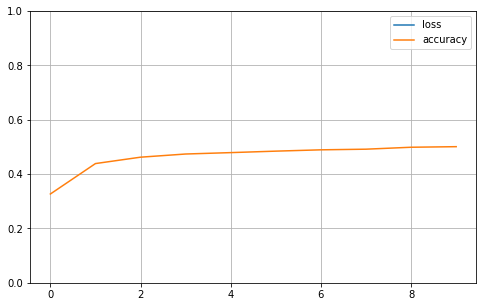

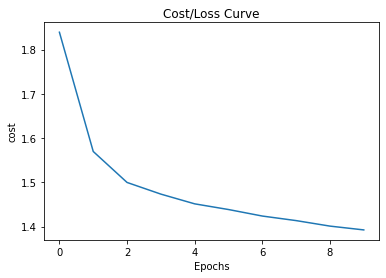

In [86]:
#visulize the loss and accuarcy curve
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(H.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

plt.plot(H.history['loss'])
plt.ylabel('cost')
plt.xlabel('Epochs')
plt.title("Cost/Loss Curve")
plt.show()

In [87]:
# Extract LBP Feature from test set
LBP_predictions=[]
LBP_predictions_labels=[]
LBP_data_test=[]
for im_index in range(len(X_test)):
  imag = X_test[im_index]
  histo = desc.LBPfeatures(imag)
  prediction = ANN_model_LBP.predict(histo.reshape(1, -1))
  LBP_predictions.append(prediction)
  LBP_predictions_labels.append(y_test[im_index])

  LBP_data_test.append(histo)

#convert to np arrays
LBP_predictions = np.array(LBP_predictions)
LBP_predictions_labels = np.array(LBP_predictions_labels)
LBP_data_test = np.array(LBP_data_test)


In [88]:
#get summary of ANN Model
ANN_model_LBP.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 26)                0         
                                                                 
 dense_12 (Dense)            (None, 128)               3456      
                                                                 
 dense_13 (Dense)            (None, 128)               16512     
                                                                 
 dense_14 (Dense)            (None, 10)                1290      
                                                                 
Total params: 21,258
Trainable params: 21,258
Non-trainable params: 0
_________________________________________________________________


In [89]:
# evaluate model against test data
results_test_LBP = ANN_model_LBP.evaluate(LBP_data_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.3591 - accuracy: 0.5089


[[ 918    0    6    8    6   28    0    7    2    5]
 [   0 1087    3    4    1    0    1   31    7    1]
 [  12    0  520  152   51   49   20  118  101    9]
 [  17    5  186  382   80   67   33   99  109   32]
 [   6    0  117   67  526   21   24   48   79   94]
 [  94    7  103  199   96  161   24  142   45   21]
 [  37    8  180  181  112   42   58   84  195   61]
 [  15   40   92   49   76   41   34  640   30   11]
 [  22    1   61  132   82   10   31   20  584   31]
 [  31   11   10   84  427   47   38   28  120  213]]


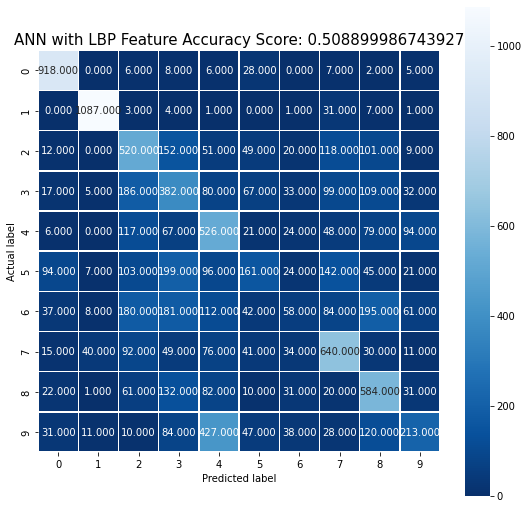

In [90]:
#obtain predictiona and accuarcy for confussion matrix
predictions_for_LBP = np.argmax(LBP_predictions, axis = -1)
cm  = metrics.confusion_matrix(y_test, predictions_for_LBP)
print(cm)

# Visulise Confussion Matrix
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'ANN with LBP Feature Accuracy Score: {0}'.format(results_test_LBP[1])
plt.title(all_sample_title, size = 15);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


one


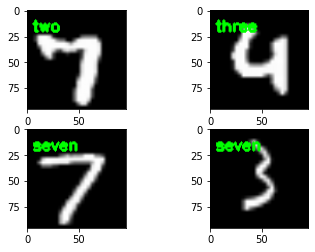

In [91]:
#visualize 10 random predictions.
images = []
orig_labels=[]
# randomly select a few testing digit items
for i in np.random.choice(np.arange(0, len(y_test)), size=(16,)):
  # classify the digit
  test_img = (X_test[i])
  histog = desc.LBPfeatures(X_test[i])
  predict_x=ANN_model_LBP.predict(histog.reshape(1, -1))
  prediction=np.argmax(predict_x,axis=1)
  label = labelNames[prediction[0]]
  orig_label=labelNames[y_test[i]]
  image = X_test[i]
  color = (0, 255, 0)
  image = cv2.merge([image] * 3)
  image = cv2.resize(image, (96, 96), interpolation=cv2.INTER_LINEAR)
  cv2.putText(image, label, (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.50, color, 2)
  images.append(image)

## Display the classification results
#Plot the image and the predicted labels
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(images[1])
print(orig_label[:])
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(images[2])
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(images[3])
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(images[4])

## **Implementing HOG Feature into ANN Model**

In [92]:
#config ANN Model 
ANN_model_HOG = models.Sequential()
ANN_model_HOG.add(layers.Flatten())
ANN_model_HOG.add(layers.Dense(128, activation='relu'))
ANN_model_HOG.add(layers.Dense(128, activation='relu'))
ANN_model_HOG.add(layers.Dense(10, activation='softmax'))

In [93]:
#HOG Feature Extraction from training data
print("Extracting features from training dataset...")
HOG_training_data = []
HOG_training_labels = []

# loop over the reshaped training images
for img_index in range(len(X_train)):
  # load the image, and extract HOG features
  image = (X_train[img_index])
  H = feature.hog(image, orientations=9, pixels_per_cell=(10, 10),
                  cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2-Hys")
  
  # update the data and labels set
  HOG_training_data.append(H)
  HOG_training_labels.append(y_train[img_index])

# convert to np array
HOG_training_data = np.array(HOG_training_data)
HOG_training_labels = np.array(HOG_training_labels)

Extracting features from training dataset...


In [94]:
#compile the model and fit with training data with 10 epochs
ANN_model_HOG.compile(
    optimizer = tf.optimizers.Adam(),
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy'])

H=ANN_model_HOG.fit(HOG_training_data, HOG_training_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6140 - accuracy: 0.8080
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4065 - accuracy: 0.8678
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3528 - accuracy: 0.8836
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3251 - accuracy: 0.8927
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3044 - accuracy: 0.8994
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2899 - accuracy: 0.9038
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2776 - accuracy: 0.9072
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2676 - accuracy: 0.9101
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2605 - accuracy: 0.9128
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.253

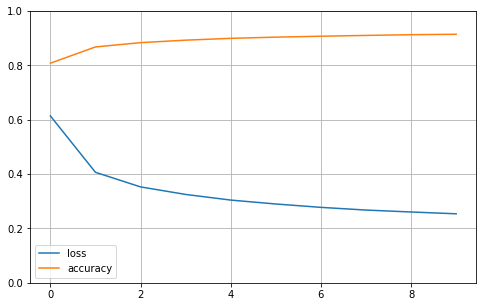

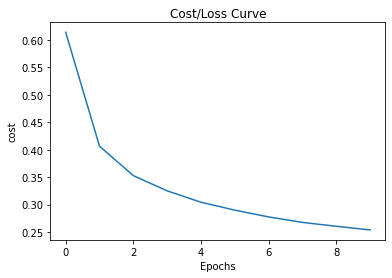

In [95]:
#visulize the loss and accuarcy curve
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(H.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

plt.plot(H.history['loss'])
plt.ylabel('cost')
plt.xlabel('Epochs')
plt.title("Cost/Loss Curve")
plt.show()

In [96]:
#HOG Feature Extraction from test data
print("Extracting features from test dataset...")
HOG_predictions = []
HOG_predictions_labels = []
HOG_data_test=[]
# loop over the training images
for img_ind in range(len(X_test)):
  image=X_test[img_ind]
  H = feature.hog(image, orientations=9, pixels_per_cell=(10, 10),
                  cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2-Hys")
  pred = ANN_model_HOG.predict(H.reshape(1, -1))[0]

  HOG_predictions.append(pred)
  HOG_data_test.append(H)
  HOG_predictions_labels.append(y_test[img_ind])

#convert to np arrays
HOG_predictions = np.array(HOG_predictions)
HOG_predictions_labels = np.array(HOG_predictions_labels)
HOG_data_test = np.array(HOG_data_test)
  

Extracting features from test dataset...


In [97]:
#get summary of ANN Model
ANN_model_HOG.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 36)                0         
                                                                 
 dense_15 (Dense)            (None, 128)               4736      
                                                                 
 dense_16 (Dense)            (None, 128)               16512     
                                                                 
 dense_17 (Dense)            (None, 10)                1290      
                                                                 
Total params: 22,538
Trainable params: 22,538
Non-trainable params: 0
_________________________________________________________________


In [98]:
results_test_HOG = ANN_model_HOG.evaluate(HOG_data_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2661 - accuracy: 0.9109


In [99]:
predictions_for_HOG = np.argmax(HOG_predictions, axis = -1)

[[ 913    6    4    0    3    5   13    0   24   12]
 [   4 1118    2    3    3    0    3    0    2    0]
 [   7    2  919   39    9    5    1   22   24    4]
 [   1    3   18  906    0   38    0    8   32    4]
 [   1    2    4    1  911    1   43    1    8   10]
 [   1    1    6   20    1  827    6    2   19    9]
 [  26    4    0    0   35   11  868    0   11    3]
 [   3    8   49   39    3    6    0  898    3   19]
 [  26    1    5   23    5   26   17    1  837   33]
 [  10    4    2    7    5   21    1    3   44  912]]


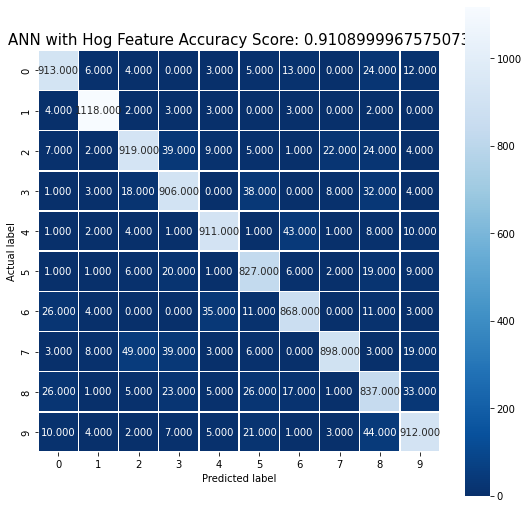

In [100]:
#obtain predictiona and accuarcy for confussion matrix
cm  = metrics.confusion_matrix(y_test, predictions_for_HOG)
print(cm)

# Visulise Confussion Matrix
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'ANN with Hog Feature Accuracy Score: {0}'.format(results_test_HOG[1])
plt.title(all_sample_title, size = 15);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


six


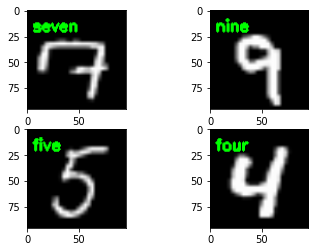

In [101]:
#visualize 10 random predictions.
images = []
orig_labels=[]
# randomly select a few testing digit items
for i in np.random.choice(np.arange(0, len(y_test)), size=(16,)):
  # classify the digit
  test_img = (X_test[i])
  H1 = feature.hog(test_img, orientations=9, pixels_per_cell=(10, 10),
                  cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2-Hys")
  predict_x=ANN_model_HOG.predict(H1.reshape(1, -1))
  prediction=np.argmax(predict_x,axis=1)
  label = labelNames[prediction[0]]
  orig_label=labelNames[y_test[i]]
  image = X_test[i]
  color = (0, 255, 0)
  image = cv2.merge([image] * 3)
  image = cv2.resize(image, (96, 96), interpolation=cv2.INTER_LINEAR)
  cv2.putText(image, label, (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.50, color, 2)
  images.append(image)

## Display the classification results
#Plot the image and the predicted labels
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(images[1])
print(orig_label[:])
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(images[2])
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(images[3])
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(images[4])